# Ejercicio 1

### Criptosistema de Vigenère

**David Cabezas Berrido, Patricia Córdoba Hidalgo, Pilar Navarro Ramírez y Yábir García Benchakhtir**

In [1]:
import unicodedata
import random
import string
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
def normalize(c):
    return unicodedata.normalize("NFD",c)[0]

def encode(cadena):
    cadena=cadena.upper().replace('Ñ','GN')
    cadena=''.join(normalize(c) for c in cadena if c.isalnum())
    return cadena

### Apartado a)

Implementamos el método `generateRandomKey`, que utiliza la asociatividad de la suma en módulo para generar una clave aleatoria de la longitud del texto. Primero genera una clave de longitud 2, luego de longitud 2\*3, luego de longitud 2\*3\*5 y así hasta tener suficientes números primos para alcanzar la longitud del mensaje.

Si no se introduce clave en el constructor, se utilizará este método la primera vez que se intente cifrar para generar una clave "aleatoria" con la longitud del mensaje.

También se podría obtener la clave aleatoria directamente introduciendo la longitud deseada en la función `generateSmallRandomKey`.

In [3]:
class Vigenere:
        
    def __init__(self,alphabet,key=None,keyLen=None):
        self.A=alphabet
        self.n=len(alphabet)
        
        # Diccionarios con los valores correspondientes a cada caracter
        self.value=dict(zip(self.A,range(self.n)))
        self.character={v:k for k,v in self.value.items()}
        
        # Si no se proporciona una clave ni longitud se generará una aleatoria cuando se intente cifrar por primera vez
        self.key=key
        
        if key==None and keyLen:
            self.key=self.generateRandomKey(keyLen)
        
            
    # Generación de claves aleatorias arbitrariamente largas combinando varias claves de longitud primo
    def generateSmallRandomKey(self,keyLen):
        # Genera una clave aleatoria de la longitud dada
        return ''.join(random.choice(self.A) for _ in range(keyLen))
    
    def generateRandomKey(self,keyLen):
        prim=Primes() # Usamos el conjunto de números primos implementado en Sage
        p=prim.next(1)
        prod=p
        key=self.generateSmallRandomKey(p)
        while prod < keyLen:    
            #print(key) # Esto no debe imprimirse, pero ayuda a comprender la generación de la clave
            p=prim.next(p)
            prod*=p
            smallKey=self.generateSmallRandomKey(p) # Generamos una clave aleatoria de longitud el siguiente primo
            self.key=smallKey # Ciframos la clave "acumulada" con la nueva clave generada
            # Ponemos mínimo para que la clave no supere la longitud del texto, de lo contrario
            # podríamos llegar a una clave mucho más larga que el texto, de la que sólo necesitaríamos un trozo
            key=self.toLength(key, min(prod, keyLen))
            key=self.cipher(key) # Ahora tenemos una clave de longitud prod         
        return key
            
    # Obtener el valor de una letra 
    def getValue(self,c):
        return self.value[c]
    
    # Obtener un letra a partir del valor 
    def getCharacter(self,v):
        return self.character[v]
        
    # Repite la clave hasta longitud length
    def toLength(self, key, length):
        return (key * (int(length/len(key))+1))[:length]
            
    # Función de cifrado
    def cipher(self,msg):
        if self.key==None:
            self.key=self.generateRandomKey(len(msg))
        
        # Cambiamos las letras por su valor correspondiente
        msg_values=list(map(self.getValue,msg))
        key_values=list(map(self.getValue,self.key))
        
        # Sumamos módulo la longitud del diccionario
        result=[(msg_values[i]+key_values[i%len(self.key)])%self.n for i in range(len(msg))]
        
        # Volvemos a convertir en caracteres y devolvemos el mensaje cifrado
        return ''.join((map(self.getCharacter,result)))
        
    # Función de descifrado
    def decipher(self, msg):
        
        # Cambiamos las letras por su valor correspondiente
        msg_values=list(map(self.getValue,msg))
        key_values=list(map(self.getValue,self.key))
        
        # Restamos módulo la longitud del diccionario
        result=[(msg_values[i]-key_values[i%len(self.key)])%self.n for i in range(len(msg))]
        
        # Volvemos a convertir en caracteres y devolvemos el mensaje descifrado
        return ''.join((map(self.getCharacter,result)))

Probamos el funcionamiento de la implementación.

In [4]:
alphabet=string.ascii_uppercase+string.digits

In [5]:
vig = Vigenere(alphabet=alphabet)

In [6]:
msg=encode('el secreto se protege a sí mismo. Mi constraseña del WI-FI es 123456')
msg

'ELSECRETOSEPROTEGEASIMISMOMICONSTRASEGNADELWIFIES123456'

In [7]:
cifrado=vig.cipher(msg) # Si no está comentado el print, se observa la generación de la clave
cifrado

'KUAX9CDS927OIO6ATNNMF3VTBN6XIRNWW1G79935XM6SP6GEEPVECRM'

In [8]:
print(vig.key) # Comprobamos que se ha creado una clave aleatoria de longitud igual a la del mensaje
print('Longitud de la clave:',len(vig.key))
print('Longitud del mensage:',len(msg))

GJST7V99VK391AN6NJN47RNBZ9UPGDAEDKGP53Q5UIV6H18AWY3LIWQ
Longitud de la clave: 55
Longitud del mensage: 55


In [9]:
vig.decipher(cifrado) # Funciona correctamente

'ELSECRETOSEPROTEGEASIMISMOMICONSTRASEGNADELWIFIES123456'

### Apartado b)

Ciframos el texto `text` utilizando el sistema de Vigenère con una clave aleatoria con longitud igual a la del texto.

In [10]:
text="""SENORDIJOELCAPITANNEMOMOSTRANDOMELOSINSTRUMENTOSCOLGADOSDELASPAREDESDESUCAMAROTE
HEAQUILOSAPARATOSEXIGIDOSPORLANAVEGACIONDELNAUTILUSALIGUALQUEENELSALONLOSTENGOAQUIBAJOMI
SOJOSINDICANDOMEMISITUACIONYMIDIRECCIONEXACTASENMEDIODELOCEANOALGUNOSDEELLOSLESONCONOCID
OSCOMOELTERMOMETROQUEMARCALATEMPERATURAINTERIORDELNAUTILUSELBAROMETROQUEPESAELAIREYPREDI
CELOSCAMBIOSDETIEMPOELHIGROMETROQUEREGISTRAELGRADODESEQUEDADDELAATMOSFERAELSTORMGLASSCUY
AMEZCLAALDESCOMPONERSEANUNCIALAINMINENCIADELASTEMPESTADESLABRUJULAQUEDIRIGEMIRUTAELSEXTA
NTEQUEPORLAALTURADELSOLMEINDICAMILATITUDLOSCRONOMETROSQUEMEPERMITENCALCULARMILONGITUDYPO
RULTIMOMISANTEOJOSDEDIAYDENOCHEQUEMESIRVENPARAESCRUTARTODOSLOSPUNTOSDELHORIZONTECUANDOEL
NAUTILUSEMERGEALASUPERFICIEDELASAGUASSONLOSINSTRUMENTOSHABITUALESDELNAVEGANTEYSUUSOMEESC
ONOCIDOREPUSEPEROHAYOTROSAQUIQUERESPONDENSINDUDAALASPARTICULARESEXIGENCIASDELNAUTILUSESE
CUADRANTEQUEVEORECORRIDOPORUNAAGUJAINMOVILNOESUNMANOMETROESUNMANOMETROENEFECTOPUESTOENCO
MUNICACIONCONELAGUACUYAPRESIONEXTERIORINDICADATAMBIENLAPROFUNDIDADALAQUESEMANTIENEMIAPARATO
"""
text=encode(text)

In [11]:
vig=Vigenere(alphabet=string.ascii_uppercase)
text=vig.cipher(text)

In [12]:
text

'LDXYHUEIIJGDWVWMGAHJGDDHQZITIJAPGZWDEKQOFUOWRCEDAZPAOSWUMBQIAANECKUXDPKKYBFXJVTDZSCFNTULJIRBSNPWPPZZKQFBRMBRPRJGRTXPBYEBRVCKUGWDSISSJNJBPHCWZAFNKJPFUVIUXSUBXXBSULIFMHBYUEEILYSWDIYBMARYVABVMQADTJJQHKVOWWZYXMFGFKDJPOJNGQMAIMRWOKTLUIHZFEQGYFXXMBPOKUAAUVPCDTUDJPPIOVHNAOROFJVCRQBACIFOJZFOBODEVVEWFEGIJPDQPBHZYGZYVSDYIUMGBPIEQBUSUORHUFFZMNGJDXSSEVJEKXPTCRKVSZEOENIOOHHMCQDDWCMCALTPWPSWIYOXLJDBOGPVGVBJAZAVQTUWMLTBAQWSEKRCHTSKLJSXUJHTOTWYSJTQPJWHRZUHRVBPUVSGBREPRIHOQNOHQRPZAFREQETMFGZKBLTHDOSFJXQYYXEDKGMKXPRRDTZQYVNVZYSCDUCQNSHBAMEQHJVCYJJNKVWLNEYAZSXJRSMLFMUBVWRHIWRKMWDGZXSZFYFEMWDYPWVZDWYJDZEZGSIMCNDCNBJQOCFAGHMSASMGPBRPPXJMOSXSSRXFTYZZYVZPNJQQQXRINTDNMBIIPEPONOTGTFYEGNSVJJWJZZFMSAXIUTKHRYCYFCWQHNAOWVQIYDUCOJCVWHCBHMAYKTBKAIYXABGOEBHKNPQXNGVQHVDSKWECZEMBRVHTMTGYWRGUSRJJULZRTIOUQLRZIJLVFZOJMOVPBLQDDBIPNKQCWYVANZEQYVTRYKIZYLXNZIOCTBPFIWXHRYTDZRNFHNGXXIYKPSLSQFHKGWLWAYNSHYFDVGUBGZHZPKTKLWFZOIOGVAELEYBCDTGKCFPURAPWZPRBMXYQTYNRVJJDXIJJUIJASLOJMPFLIIBXPPTMQRBNDBBUEVOQJKNJBGDPEZZSYFVONKPLDIPMJGXTUIS

In [13]:
# Comprobamos que se ha creado una clave aleatoria de longitud igual a la del texto
print('Longitud de la clave:',len(vig.key))
print('Longitud del mensage:',len(text))

Longitud de la clave: 1051
Longitud del mensage: 1051


### Apartado c)

El símbolo que queda en la posición $i$ del texto cifrado corresponde a la suma de los valores numéricos del símbolo que aparece en la posición $i$ del texto original y del símbolo en la posición $i$ de la clave. Puesto que este último es aleatorio y no guarda relación aparente con el resto de símbolos de la clave, el símbolo que aparece en la posición $i$ del texto cifrado es aleatorio e independiente del resto de símbolos de dicho texto.

En conclusión, el texto que acabamos de generar es tan aleatorio como la clave misma. Por tanto, los ataques estudiados, que se basan en la repetición de cadenas y en las frecuencias de los diferentes símbolos del lenguaje (algunos símbolos se repiten más que otros), tienen nula probabilidad de éxito.

A continuación ejemplificamos como tanto el método de Kasiski como el de Friedman fracasan a la hora de obtener la longitud de clave.

#### Método de Kasiski

La implementación de las funciones que utilizamos para este método puede encontrarse en: https://github.com/ichantzaras/creamcrackerz

Primero encontramos las sequencias de caracteres que se repiten en el texto cifrado.

In [14]:
# Encuentra secuencias de caracteres que se repiten dos o más veces, así como las posiciones en las que aparecen
def repeated_seq_pos(text, seq_len):
    seq_pos = {}  # Guardaremos en un diccionario todas las secuencias y las posiciones en las que aparecen
    for i, char in enumerate(text): # Recorremos el texto
        next_seq = text[i:i+seq_len] # Tomamos cada posible secuencia de seq_len caracteres
        if next_seq in seq_pos.keys(): # Si la secuencia ya había ocurrido, añadimos la nueva posición
            seq_pos[next_seq].append(i)
        else: # Si no había ocurrido, añadimos su primera ocurrencia
            seq_pos[next_seq] = [i]
    repeated = list(filter(lambda x: len(seq_pos[x]) >= 2, seq_pos)) # Nos quedamos con las secuencias que tienen 2 o más ocurrencias
    rep_seq_pos = [(seq, seq_pos[seq]) for seq in repeated]
    return rep_seq_pos

In [15]:
secuencias=repeated_seq_pos(text,3) # Buscamos secuencias de longitud 3
secuencias

[('JGD', [9, 19]),
 ('IJA', [28, 937]),
 ('CKU', [64, 122]),
 ('TDZ', [78, 842]),
 ('PWP', [94, 375]),
 ('MBR', [105, 754]),
 ('BRP', [106, 617]),
 ('BRV', [119, 755]),
 ('NJB', [133, 970]),
 ('ZAF', [140, 467]),
 ('YVA', [183, 809]),
 ('MFG', [205, 475]),
 ('DJP', [210, 255]),
 ('CDT', [251, 903]),
 ('HNA', [262, 696]),
 ('NAO', [263, 697]),
 ('JVC', [269, 529]),
 ('ZYV', [306, 635]),
 ('JDX', [335, 930]),
 ('XSS', [337, 626]),
 ('KXP', [344, 499]),
 ('QDD', [365, 798]),
 ('QYV', [507, 815]),
 ('DUC', [516, 705]),
 ('NSH', [520, 870]),
 ('MWD', [564, 576]),
 ('MSA', [610, 679]),
 ('JMO', [622, 791]),
 ('VJJ', [671, 928]),
 ('HRY', [687, 839]),
 ('JJU', [770, 934]),
 ('FZO', [788, 890]),
 ('OJM', [790, 942]),
 ('SQF', [859, 1018])]

Ahora calculamos las diferencias (el espacio) entre las posiciones de las ocurrencias.
Si una secuencia se repite, es probable que lo haga tras un múltiplo de la longitud de la clave.

In [16]:
# Devuelve una lista con las diferencias entre las posiciones de las ocurrencias
def get_spacings(positions):
    return [positions[i+1] - positions[i] for i in range(len(positions)-1)]

In [17]:
seq_espacios = {}
for seq, positions in secuencias:
    seq_espacios[seq] = get_spacings(positions)
[(k,v) for k,v in seq_espacios.items()]

[('JGD', [10]),
 ('IJA', [909]),
 ('CKU', [58]),
 ('TDZ', [764]),
 ('PWP', [281]),
 ('MBR', [649]),
 ('BRP', [511]),
 ('BRV', [636]),
 ('NJB', [837]),
 ('ZAF', [327]),
 ('YVA', [626]),
 ('MFG', [270]),
 ('DJP', [45]),
 ('CDT', [652]),
 ('HNA', [434]),
 ('NAO', [434]),
 ('JVC', [260]),
 ('ZYV', [329]),
 ('JDX', [595]),
 ('XSS', [289]),
 ('KXP', [155]),
 ('QDD', [433]),
 ('QYV', [308]),
 ('DUC', [189]),
 ('NSH', [350]),
 ('MWD', [12]),
 ('MSA', [69]),
 ('JMO', [169]),
 ('VJJ', [257]),
 ('HRY', [152]),
 ('JJU', [164]),
 ('FZO', [102]),
 ('OJM', [152]),
 ('SQF', [159])]

Ahora hallamos los divisores propios de esas diferencias.

In [18]:
# Calcula los factores del número number
def get_factors(number):
    factors = set()
    for i in range(1, int(sqrt(number))+1):
        if number % i == 0:
            factors.add(i)
            factors.add(number//i)
    return sorted(factors)

In [19]:
# Sacamos la lista de factores de las diferencias entre las posiciones de las occurencias
factor_lists = []
for espacios in seq_espacios.values():
    for espacio in espacios:
        factor_lists.append(get_factors(number=espacio))
factor_lists

[[1, 2, 5, 10],
 [1, 3, 9, 101, 303, 909],
 [1, 2, 29, 58],
 [1, 2, 4, 191, 382, 764],
 [1, 281],
 [1, 11, 59, 649],
 [1, 7, 73, 511],
 [1, 2, 3, 4, 6, 12, 53, 106, 159, 212, 318, 636],
 [1, 3, 9, 27, 31, 93, 279, 837],
 [1, 3, 109, 327],
 [1, 2, 313, 626],
 [1, 2, 3, 5, 6, 9, 10, 15, 18, 27, 30, 45, 54, 90, 135, 270],
 [1, 3, 5, 9, 15, 45],
 [1, 2, 4, 163, 326, 652],
 [1, 2, 7, 14, 31, 62, 217, 434],
 [1, 2, 7, 14, 31, 62, 217, 434],
 [1, 2, 4, 5, 10, 13, 20, 26, 52, 65, 130, 260],
 [1, 7, 47, 329],
 [1, 5, 7, 17, 35, 85, 119, 595],
 [1, 17, 289],
 [1, 5, 31, 155],
 [1, 433],
 [1, 2, 4, 7, 11, 14, 22, 28, 44, 77, 154, 308],
 [1, 3, 7, 9, 21, 27, 63, 189],
 [1, 2, 5, 7, 10, 14, 25, 35, 50, 70, 175, 350],
 [1, 2, 3, 4, 6, 12],
 [1, 3, 23, 69],
 [1, 13, 169],
 [1, 257],
 [1, 2, 4, 8, 19, 38, 76, 152],
 [1, 2, 4, 41, 82, 164],
 [1, 2, 3, 6, 17, 34, 51, 102],
 [1, 2, 4, 8, 19, 38, 76, 152],
 [1, 3, 53, 159]]

Los candidatos a ser la longitud de clave dividiran a la mayoría de los espacios entre ocurrencias de cada secuencia.

In [20]:
def candidate_key_lengths(factor_lists, max_key_len):
    # Unimos todos los factores en una lista
    all_factors = [factor_lists[lst][fac] for lst in range(len(factor_lists)) for fac in range(len(factor_lists[lst]))]
    # Excluimos los mayores que la longitud máxima de clave
    candidate_lengths = list(filter(lambda x:  x <= max_key_len, all_factors))
    # Los ordenamos según el número de veces que aparecen
    sorted_candidates = sorted(set(candidate_lengths), key=lambda x: all_factors.count(x), reverse=True)
    return sorted_candidates

In [21]:
ckl = candidate_key_lengths(factor_lists=factor_lists, max_key_len=10000)
ckl

[1,
 2,
 3,
 4,
 7,
 5,
 9,
 6,
 10,
 14,
 31,
 17,
 27,
 8,
 11,
 12,
 13,
 15,
 19,
 35,
 38,
 45,
 53,
 62,
 76,
 152,
 159,
 217,
 434,
 18,
 20,
 21,
 22,
 23,
 25,
 26,
 28,
 29,
 30,
 34,
 41,
 44,
 47,
 50,
 51,
 52,
 54,
 58,
 59,
 63,
 65,
 69,
 70,
 73,
 77,
 82,
 595,
 85,
 90,
 93,
 101,
 102,
 106,
 109,
 626,
 119,
 636,
 130,
 135,
 649,
 652,
 154,
 155,
 163,
 164,
 169,
 175,
 189,
 191,
 212,
 764,
 257,
 260,
 270,
 279,
 281,
 289,
 303,
 308,
 313,
 318,
 837,
 326,
 327,
 329,
 350,
 382,
 909,
 433,
 511]

In [22]:
len(text) in ckl

False

Como era de esperar, la longitud del texto (que también es la de la clave), no se encuentra en la lista de candidatos a longitud de clave, ya que es imposible que una secuencia de caracteres tenga dos ocurrencias separadas por este número de posiciones.

#### Test de Friedman

In [23]:
# Divide el texto en trozos de longitud size
def get_blocks(text, size):
    blocks = [text[i:i+size] for i in range(0, len(text)-size, size)]
    return blocks

In [24]:
# Crea size strings uniendo las letras cuya posición se diferencia en un múltiplo de size
def get_columns(text_blocks):
    group_size = len(text_blocks[0])
    columns = []
    for letter_count in range(group_size):
        column = ''
        for group_count in range(len(text_blocks)):
            column += text_blocks[group_count][letter_count]
        columns.append(column)
    return columns

In [25]:
# Calcula el índice de coincidencia
def IndCo(s):
    n = len(s)
    F = Counter(list(s))
    return sum([F[c]*(F[c]-1) for c in string.ascii_uppercase])/(n*(n-1))

In [26]:
# Frecuencias relativas correspondientes al inglés, español y aleatorio
kp_EN = 0.0685
kp_ES = 0.07185
kr=1/26

In [27]:
# Fórmula de las Kappa
def kappaFrac(k0):
    return (kp_ES-kr)/(k0-kr)

$$\frac{\kappa_p-\kappa_r}{\kappa_0-\kappa_r}$$
donde $\kappa_p$ es la frecuencia relativa correspondiente al idioma, en este caso español.

Esta fórmula aplicada al índice de coincidencias del texto completo debería ofrecer una estimación de la longitud de clave. Dado que el texto es aleatorio, su índice de coincidencias es muy cercano a $\kappa_r$. Esto provoca que el resultado de evaluar la fracción se dispare, puesto que el denominador es cercano a 0. Por tanto, fracasamos al obtener una estimación de la longitud de clave.

In [28]:
print(float(kr))
print(float(IndCo(text)))
print(kappaFrac(IndCo(text)))

0.038461538461538464
0.03833265370848625
-259.056721200649


Fijado un candidato a longitud de clave, se puede dividir el texto en columnas y calcular el índice de coincidencias de cada columna. La longitud de clave correcta dará lugar a que las columnas tengan un índice de frecuencias cercano al del idioma del texto original o, equivalentemente, un valor en la fórmula de las *kappa* cercano a 1.

Para evaluar este índice en una columna, esta columna debe tener al menos dos símbolos, por lo que este método sólo nos permite considerar longitudes de clave menores o iguales a $\left\lfloor \frac{\texttt{len(text)}}{2} \right\rfloor$. Esto excluye la longitud de clave.

In [29]:
# Calculamos del índice IndCo para distintas longitudes de clave
frac = []

for keyLen in range(1,526): # Sólo podemos probar hasta este valor
    blocks=get_blocks(text,keyLen)
    columns=get_columns(blocks)
    indco = []
    for i in range(keyLen):
        indco.append(IndCo(columns[i]))
    
    # Este cociente se acerca a 1 cuando la frecuencia de las letras es similar a la del idioma
    # y se dispara cuando la frecuencia es similar a la que obtendríamos eligiendo letras al azar.
    frac.append(kappaFrac(sum(indco)/len(indco)))

In [30]:
def graf_barras(data):
    fig, ax = plt.subplots()
    ax.bar(range(1,526), data, color='lime')
    ax.set_title('Comparación de distintas longitudes de clave')
    ax.set_xlabel('Longitud de clave')

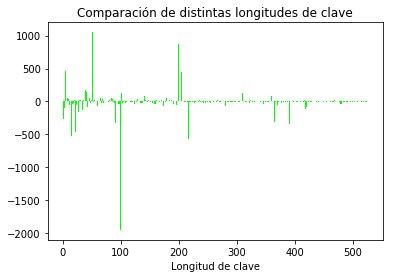

In [31]:
graf_barras(frac)

La aleatoriedad del texto provoca valores muy dispares al evaluar la fórmula de las *kappas* para los distintos tamaños de clave.

Incluso aunque el atacante se percatase de la aleatoriedad del texto y sospechase que la clave utilizada tiene la longitud del texto, no podría enfrentarse a un texto totalmente aleatorio, por lo que los métodos para obtener la clave fracasarán.

Tanto el método del artículo https://www.researchgate.net/publication/221581427_An_Interactive_Cryptanalysis_Algorithm_for_the_Vigenere_Cipher, como el método del libro *An Introduction to Mathematical Cryptography* depende de dividir el texto en tantas columnas como la longitud de clave. En este caso obtendríamos `len(text)` columnas con un elemento.

En el primero de ellos, se calcula el índice de coincidencia mutuo de cada columna para cada desplazamiento del alfabeto, y se toma el valor que consiga un mayor índice. Al tener las columnas un sólo símbolo, siempre obtendríamos el desplazamiento que transforme ese símbolo en el más frecuente del lenguaje. Por tanto, acabaríamos con un texto formado por `len(text)` repeticiones de este símbolo.

En el segundo método, comparamos las frecuencias relativas entre las columnas para distintos desplazamientos y se plantea un sistema que permite despejar el resto de caracteres de la clave a partir de uno dado. En este caso, el índice de coincidencias será 0 si los símbolos son diferentes y 1 para el desplazamiento que haga que los símbolos sean el mismo. Los candidatos que obtendríamos serían claves formadas por el mismo caracter.

Podría pensarse que hemos creado un sistema que permite un cifrado inatacable, al menos mientras generemos una clave aleatoria para cada mensaje a cifrar. Sin embargo, la compartición de la clave aleatoria por un canal seguro es tan difícil como la compartición del propio texto, lo que hace este método poco práctico.